In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
## 读取数据
# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = './datas/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x, y = data[list(range(4))], data[4]
y = pd.Categorical(y).codes
x = x[[0, 1]]

In [9]:
## 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28, train_size=0.6)

In [10]:
# svm.SVC API说明：
# 功能：使用SVM分类器进行模型构建
# 参数说明：
# C: 误差项的惩罚系数，默认为1.0；一般为大于0的一个数字，C越大表示在训练过程中对于总误差的关注度越高，也就是说当C越大的时候，对于训练集的表现会越好，
# 但是有可能引发过度拟合的问题(overfiting)
# kernel：指定SVM内部函数的类型，可选值：linear、poly、rbf、sigmoid、precomputed(基本不用，有前提要求，要求特征属性数目和样本数目一样)；默认是rbf；
# degree：当使用多项式函数作为svm内部的函数的时候，给定多项式的项数，默认为3
# gamma：当SVM内部使用poly、rbf、sigmoid的时候，核函数的系数值，当默认值为auto的时候，实际系数为1/n_features
# coef0: 当核函数为poly或者sigmoid的时候，给定的独立系数，默认为0
# probability：是否启用概率估计，默认不启动，不太建议启动
# shrinking：是否开启收缩启发式计算，默认为True
# tol: 模型构建收敛参数，当模型的的误差变化率小于该值的时候，结束模型构建过程，默认值:1e-3
# cache_size：在模型构建过程中，缓存数据的最大内存大小，默认为空，单位MB
# class_weight：给定各个类别的权重，默认为空
# max_iter：最大迭代次数，默认-1表示不限制
# decision_function_shape: 决策函数，可选值：ovo和ovr，默认为None；推荐使用ovr；（1.7以上版本才有）
# '''

In [11]:
## 数据SVM分类器构建
clf = svm.SVC(C=1, kernel='linear')

## 模型训练
clf.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
## 计算模型的准确率/精度
print (clf.score(x_train, y_train)) 
print ('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print (clf.score(x_test, y_test))
print ('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

## 计算决策函数的结构值以及预测值(decision_function计算的是样本x到各个分割平面的距离<也就是决策函数的值>)
print ('decision_function:\n', clf.decision_function(x_train))
print ('\npredict:\n', clf.predict(x_train))

0.822222222222
训练集准确率： 0.822222222222
0.783333333333
测试集准确率： 0.783333333333
decision_function:
 [[ -1.39999882e+00  -9.99758749e-01   7.33899720e-01]
 [  1.00001568e+00   7.45207354e-01  -6.06346784e-01]
 [ -1.40000172e+00  -9.43327605e-01   1.00102775e+00]
 [  1.19999393e+00   1.33736775e+00   1.39672959e+00]
 [ -3.19997127e+00  -3.05619598e+00  -1.80036183e+00]
 [  2.20000698e+00   1.92806170e+00   1.92734141e-01]
 [  2.39998814e+00   2.46379095e+00   1.92868249e+00]
 [  1.19999393e+00   1.33736775e+00   1.39672959e+00]
 [ -1.47633540e-05   4.93100274e-01   2.20041686e+00]
 [ -3.59998867e+00  -3.05546276e+00  -1.96825911e-01]
 [  1.19999973e+00   1.22450546e+00   8.62473530e-01]
 [ -1.00000462e+00  -5.49042823e-01   1.26738806e+00]
 [ -1.39999302e+00  -1.11262104e+00   1.99643656e-01]
 [  2.39999393e+00   2.35092866e+00   1.39442642e+00]
 [ -2.39997707e+00  -2.26762642e+00  -1.26764121e+00]
 [ -9.99998817e-01  -6.61905112e-01   7.33131996e-01]
 [  1.40000118e+00   1.36521671e+00   7.

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:552: ChangedBehaviorWarning: The decision_function_shape default value will change from 'ovo' to 'ovr' in 0.19. This will change the shape of the decision function returned by SVC.
  "SVC.", ChangedBehaviorWarning)


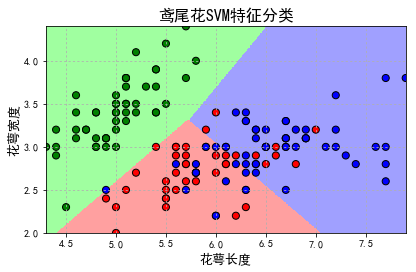

In [14]:
# 画图
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点


grid_hat = clf.predict(grid_show)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
## 区域图
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()